# Задача 2.1.

---

Выборка: 2.1.csv.

Рассматривается задача тестирования вакцины от некоторого вируса. Производство вакцины очень дорогое и затратное по времени, поэтому в день может быть произведена только одна ампула.

Требуется проверить, что вакцина помогает (вероятность заразиться меньше у человека с вакциной чем у человека без вакцины).

Эксперимент ставится следующим образом: каждый день есть два идентичных по здоровью человека. Один из людей принимает вакцину, а второй нет, после чего обоих ставят в одну среду с вирусом. В конце для проверяют кто заразился. (В таблице: s - sick; h - healthy)

Весь мир ждет вакцину от данного вируса, поэтому к руководству института постоянно приходят запросы о сроках завершения тестирования образца. Руководство поручило Вам оценить среднее время, которое понадобится на тестирования данной вакцины. А также провести анализ полученных данных на уровне значимости $\alpha=0.05$ и при ошибке второго рода $\beta=0.2$.

Требуется:

- Записать задачу формально
- Выполнить оценку среднего количества дней для принятия решения (учесть что истинная вероятность заразиться с вакциной и без равны $p_1 = 0.2$, $p_2 = 0.5$ соответственно)
- Выполнить анализ данных и выяснить работает ли вакцина или нет

Все выкладки должны быть сделаны аналитически, без использования компьютера.

---

In [16]:
import numpy as np
import pandas as pd
import sprt
import scipy
import scipy.stats as ss

Puchkov task2.ipynb

Загрузим данные:

In [10]:
df = pd.read_csv('2.1.csv')
df

,with vaccine,without vaccine
0,h,h
1,h,s
2,h,s
3,h,h
4,h,h
5,h,s
6,h,h
7,h,s
8,h,s
9,h,s


## 1. Формальная постановка задачи:

Условия:
- $H_0$ - вероятность заразиться меньше у человека с вакциной, чем у человека без вакцины ($p\leq lower$).
- $H_1$ - вероятность заразиться больше либо равна у человека с вакциной, чем у человека без вакцины($p\geq upper$).
- $lower$ - нижняя граница области безразличия
- $upper$ - верхняя граница области безразличия
- $\alpha$ - ошибка 1 рода, отвергаем $H_0$ при $p\leq lower$ при ее верности
- $\beta$ - ошибка 2 рода, принимаем $H_1$ при $p\geq upper$ при ее верности
- $X_1=(X_1^0,...,X_1^{29})$, $X_2=(X_2^0,...,X_2^{29})$ - выборки

Статистика: 
- $d_m(X_1, X_2) = \sum_{i=0}^29(1-X_1^i)X_2^i$

Обозначения:
- $A=\frac{1-\beta}{\alpha}$
- $B=\frac{\beta}{1-\alpha}$
- $h$ - решение следующего уравнения: $p=\frac{1-(\frac{1-upper}{1-lower})^x}{(\frac{upper}{lower})^x-(\frac{1-upper}{1-lower})^x}$
- Оперативная характеристика: $L=\frac{A^h-1}{A^h-B^h}$
- Мат. ожидание числа итераций: $E=\frac{L\log B + (1-L)\log A}{p\log\frac{p}{p_0}+(1-p)\log\frac{1-p}{1-p_0}}$

## 2. Мат. ожидание числа итераций:

In [11]:
alpha = 0.05
beta = 0.2
p1 = 0.2
p2 = 0.5

def expectation(p, p_0, alpha, beta, h):
    A = (1 - beta)/alpha
    B = beta/(1 - alpha)
    L = (A**h - 1)/(A**h - B**h)
    
    result = (L * np.log(B) + (1 - L) * np.log(A))/ (p * np.log(p/p_0) + (1 - p) * np.log((1 - p)/(1 - p_0)) )
    
    return result


def f(x):
    s = (1 - ((1 - p2)/(1 - p1))**x)/((p2/p1)**x - ((1 - p2)/(1 - p1))**x ) - p2
    return s

solution = scipy.optimize.root_scalar(f, bracket=[-10, 10], method='brentq')
print('\n Математическое ожидание числа итераций:', int(expectation(p2, p1, alpha, beta, solution.root)))


 Математическое ожидание числа итераций: 8


Воспользуемся последовательным критерием Вальда. Вероятность заразиться меньше у человека с вакциной, чем у человека без вакцины $\Leftrightarrow$ $\forall i: df[i][0]>df[i][1]$.

In [12]:
temp = (df.values == 'h').astype(int)
df = pd.DataFrame(temp)
df.columns = ['with vaccine', 'without vaccine']
df['deltas'] = (df['with vaccine'] > df['without vaccine'])

**Формальная постановка задачи** после преобразования данных: найти минимальный шаг, при котором мы покинем область безразличия.

Decision:	Continue

    values  lower   upper
n                        
21    10.0  5.996   9.120
22    10.0  6.335   9.459
23    10.0  6.674   9.798
24    10.0  7.013  10.137
25    11.0  7.352  10.476
26    11.0  7.691  10.815
27    12.0  8.030  11.154
28    12.0  8.369  11.493
29    12.0  8.708  11.832
30     NaN  9.047  12.171


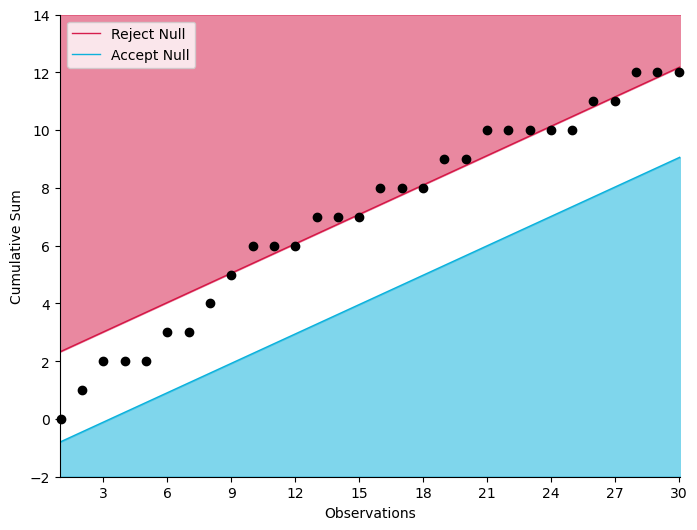

In [17]:
temp = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=p1, h1=p2, values=df['deltas'])
temp.plot()

## 3. Минимальное количество итераций для вынесения решения по данной гипотезе

Decision:	Reject

    values  lower  upper
n                       
1      1.0 -0.785  2.339
2      2.0 -0.446  2.678
3      2.0 -0.107  3.017
4      2.0  0.232  3.356
5      3.0  0.571  3.695
6      3.0  0.910  4.034
7      4.0  1.249  4.373
8      5.0  1.588  4.712
9      6.0  1.927  5.051
10     NaN  2.266  5.390


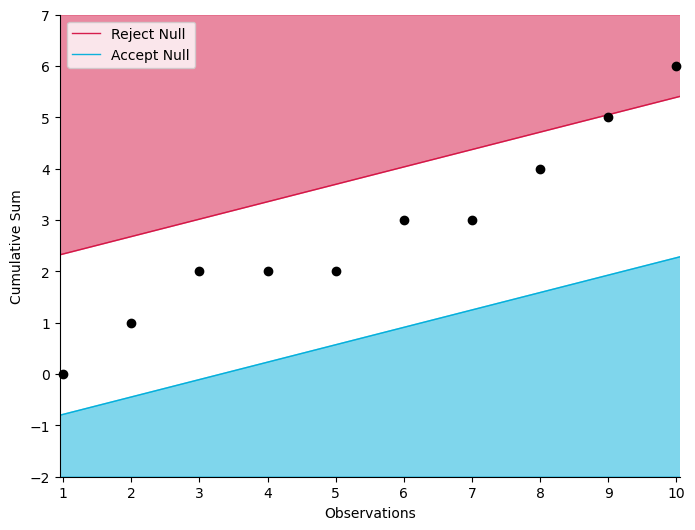

In [18]:
temp = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=p1, h1=p2, values=df['deltas'][:10])
temp.plot()

**Вывод**: потребуется 10 дней для тестирования образца (на 10-м шаге мы попадаем в область отклонения), то есть вакцина не работает .

